In [4]:
import re
import easygui
root = easygui.fileopenbox(default = "C:/Users/user") # open file

In [5]:
text = open(root, encoding = "UTF-8-sig").read().lower() # read and lower the text
import spacy
nlp_es = spacy.load("es_core_news_lg") # load the Spanish model
doc_es = nlp_es(text)
token_list_cleaned = [token.lemma_ for token in doc_es if token.is_alpha] # get lemmatized words made up of characters

In [6]:
from collections import Counter 
frequency_list = list(Counter(token_list_cleaned).values()) # calculate and get frequency of word tokens
word_list = list(Counter(token_list_cleaned).keys())
len_list = [len(word) for word in word_list] # get length of each word token

In [7]:
sorted_data = sorted(zip(word_list,frequency_list,len_list), key = lambda x : -x [2], reverse = True) # sort word frequency by length
word_freq = {}
for pairs in sorted_data:
    word_freq[pairs[0]] = pairs[1] # make dictionary of word frequency

In [8]:
initial_frequency = list(word_freq.values())[0] # retrieve the frequency of the shortest word
abnormal_word_list = []
abnormal_word_len = []
abnormal_word_freq = []
for word, freq in word_freq.items():
    if initial_frequency >= freq: # if the frequency of the following word is smaller, than the standard frequency will be reset
        initial_frequency = freq 
    else:
        abnormal_word_list.append(word) # if not, the word violates the law
        abnormal_word_freq.append(freq)
        abnormal_word_len.append(len(word))
print(len(abnormal_word_list)) # how many word types violate the law
print((len(abnormal_word_list) / len(word_list))) # and its proportion in regard with all the types
print(abnormal_word_list)

179
0.34689922480620156
['a', 'de', 'el', 'en', 'su', 'él', 'no', 'ya', 'al', 'si', 'que', 'más', 'mil', 'ser', 'uno', 'día', 'del', 'año', 'dos', 'por', 'con', 'ver', 'oms', 'sin', 'red', 'onu', 'este', 'país', 'bajo', 'paso', 'hora', 'para', 'pero', 'zona', 'tres', 'todo', 'afad', 'como', 'vida', 'cero', 'ante', 'otro', 'sirio', 'haber', 'pasar', 'noche', 'temer', 'cifra', 'final', 'mucho', 'estar', 'cinco', 'turco', 'hatay', 'nuevo', 'calle', 'hogar', 'poder', 'entre', 'menos', 'siria', 'aquel', 'hasta', 'según', 'tanto', 'abrir', 'quien', 'tener', 'venir', 'ayuda', 'vídeo', 'pedir', 'grupo', 'gente', 'fuera', 'desde', 'suelo', 'lunes', 'donde', 'medio', 'móvil', 'contra', 'muerto', 'ciento', 'martes', 'alguno', 'tratar', 'dañado', 'número', 'herido', 'herida', 'quedar', 'cuenta', 'decena', 'ciudad', 'españa', 'equipo', 'varios', 'seguir', 'llegar', 'porque', 'grieta', 'imagen', 'puerto', 'grande', 'agency', 'millón', 'enviar', 'tienda', 'llamar', 'turquía', 'persona', 'refugio', 'v

### curve fitting

In [57]:
len_list = []
freq_list = []
for pairs in sorted_data:
    len_list.append(pairs[2]) # get length list
    freq_list.append(pairs[1]) # get freqeuncy list

In [76]:
import numpy as np
from scipy.optimize import curve_fit
def func(x,a,b,c):
    return b * np.power(a,x) + c # define function for curve fitting
#popt, pcov = curve_fit(func,x,y)

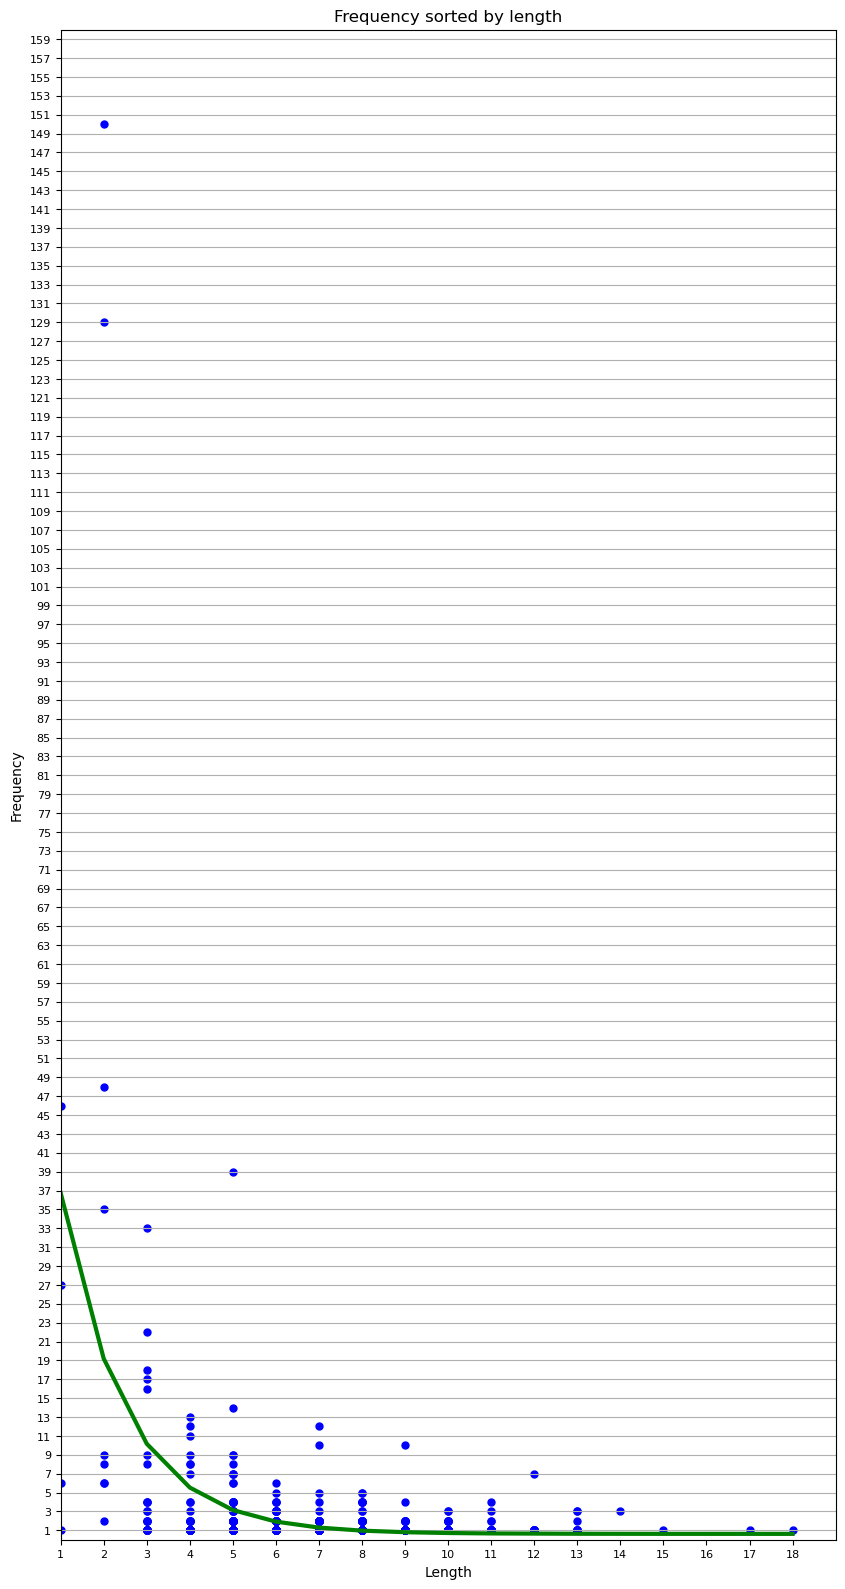

In [82]:
import matplotlib.pyplot as plt
x = np.array(len_list) # set length as x-values 
y = np.array(freq_list) # set frequency as y-values
plt.figure(figsize = (10,20), dpi = 100)
plt.ylabel("Frequency", fontsize = 10)
plt.xlabel("Length", fontsize = 10)
plt.title("Frequency sorted by length", fontsize = 12)
plt.yticks(range(1,max(freq_list)+10,2), fontsize = 8) 
plt.xticks(range(1,max(len_list)+1,1),fontsize = 8)
plt.axis([1,max(len_list)+1,0,max(freq_list)+10]) # set the axises
plt.scatter(x, y, 25, color = "b", alpha = 1) # scatter of the words
popt, pcov = curve_fit(func,x,y)
y3 = [func(i, popt[0],popt[1],popt[2]) for i in x] # calculate y-values for curve fitting
plt.plot(x,y3, color = "g", linewidth = "3", linestyle = "-") # draw the curve
plt.grid(axis = "y") # set grids
plt.show()

### distribution of length of word types in Spanish

In [ ]:
nltk.download("cess_esp")

In [9]:
import nltk
from nltk.corpus import cess_esp
vocab_es = []
for token in cess_esp.words():
    if token.isalpha() and not token in vocab_es:
        vocab_es.append(token.lower()) # extract word types from a corpus
vocab_es_len = Counter([len(word) for word in vocab_es]) # count frequecy of length
len_list_corpus = list(vocab_es_len.keys())
freq_list_corpus = list(vocab_es_len.values())

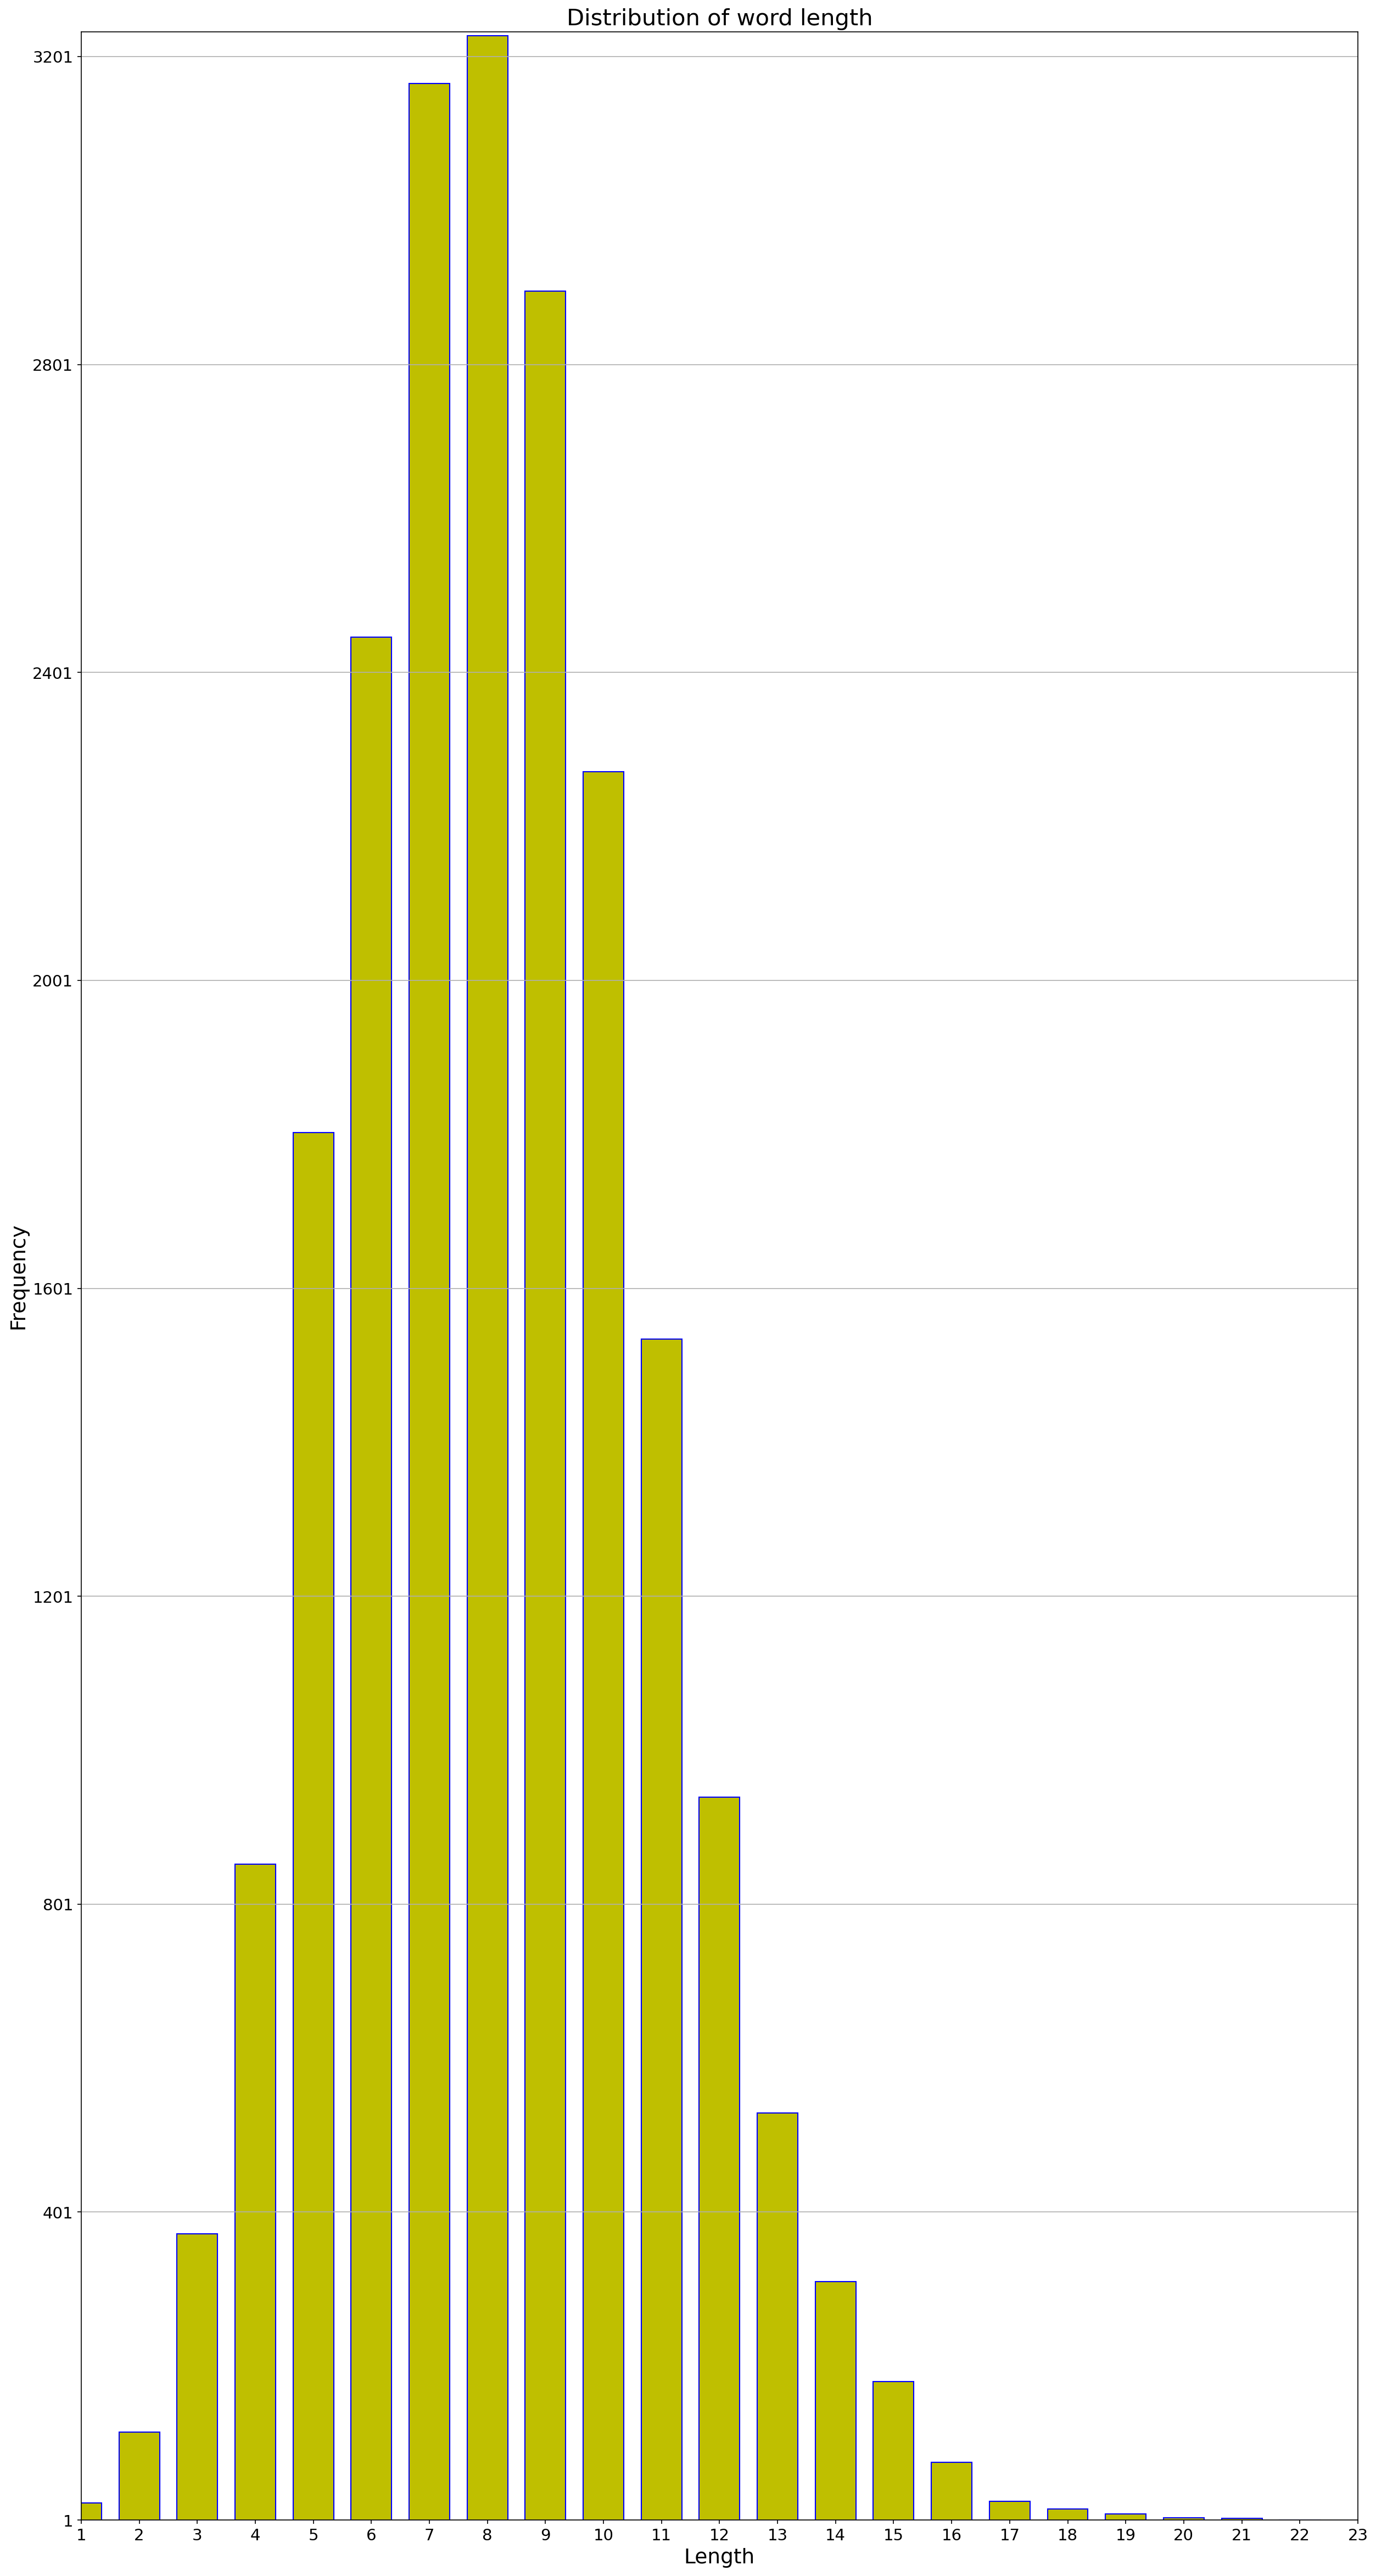

In [16]:
x6 = np.array(len_list_corpus) # set length as x-values
y6 = np.array(freq_list_corpus) # set freqeuncy as y_values
plt.figure(figsize = (20,40),dpi = 150) 
plt.ylabel("Frequency",fontsize = 18)
plt.xlabel("Length", fontsize = 18)
plt.title("Distribution of word length", fontsize = 20)
plt.xticks(range(1,max(len_list_corpus)+2,1),fontsize = 14)
plt.yticks(range(1,max(freq_list_corpus)+5,400),fontsize = 14)
plt.axis([1,max(len_list_corpus)+1,1,max(freq_list_corpus)+5])
plt.bar(x6,y6, facecolor = "y", edgecolor = "b", width = 0.7) # set bars
plt.grid(axis = "y")
plt.show()